<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Описание проекта</h1>
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Шаг 1. Открываю файл с данными и изучию общую информацию</h1>
Путь к файлам: /datasets/data.csv
    

In [121]:
import pandas as pd
data = pd.read_csv('/datasets/games.csv')
print(data.head(5))
print(data.info())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Выводы</h1>
Из полученных данных видно. Что в данных есть пропукски. Особенно в оценках пользователей и критиков. ( Что вероятнее всего не всем играм ставят оценки и это вводится ручками). Для дальнейшей работы необхожимо изменить тип данных Year_of_Release. И Critic_Score и User_Score из object перевсти в int или float64.

<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Шаг 2. Подготавливаю данные</h1>   

Заменяю названия столбцов (привожу к нижнему регистру) 

In [122]:
data.columns = data.columns.str.lower()
print(data.head(5))

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


Подготовка данных
Привединие данных к нужным типам;
1)Проверила на дубликаты 
2)Проверила кол-во пропусков


In [123]:
print(data.duplicated().sum())
print(data.isnull().sum())

0
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Удаляю строки с пропущенными значениями. Преобразую данные с годами в тип int. Заполняю пропущенные данные средними значениями. Меняю тип данных на int

In [124]:
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'] =data['year_of_release'].astype('int')

data['critic_score'].fillna((data['critic_score'].mean()), inplace=True)
data['critic_score'] =data['critic_score'].astype('int')
print(data.isnull().sum())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6607
rating             6678
dtype: int64


Аббревиатура 'tbd' в столбцах с рейтингом.
TBD = To Be Determined, т.е. не определен. В каком-то смысле это None и так, как таких значений не очень много я их удалила; User_Score преобразовала данные в тип float64

In [125]:
import numpy as np
print(np.sum(data['user_score'] == 'tbd'))

data=data.drop(data.index[data['user_score'] == 'tbd'].tolist())
print(np.sum(data['user_score'] == 'tbd'))
data['user_score'] = data['user_score'].fillna('0').astype(np.float64)

data['rating'].fillna('0', inplace=True)

print(data.isnull().sum())
print(data.info())

2376
0
name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14070 entries, 0 to 16714
Data columns (total 11 columns):
name               14068 non-null object
platform           14070 non-null object
year_of_release    14070 non-null int64
genre              14068 non-null object
na_sales           14070 non-null float64
eu_sales           14070 non-null float64
jp_sales           14070 non-null float64
other_sales        14070 non-null float64
critic_score       14070 non-null int64
user_score         14070 non-null float64
rating             14070 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.3+ MB
None


Посчитала суммарные продажи во всех регионах и записала их в отдельный столбец sales. 

In [126]:
data['sales']= data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 
print(data.head(5))

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  sales  
0     28.96      3.77         8.45            76         8.0      E  82.54  
1      3.58      6.81         0.77            68         0.0      0  40.24  
2     12.76      3.79         3.29            82         8.3      E  35.52  
3     10.93      3.28         2.95            80         8.0      E  32.77  
4      8.89     10.22         1.00            68         0.0      0  31.38  


<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Выводы</h1>
Привела название столбцов к нижнему регистру. Удалила строки с пропущенными значениями. Преобразовала данные с годами в тип int. Заполнила пропущенные данные средними значениями. Поменяла тип данных. Посчитала суммарные продажи во всех регионах и записала их в отдельный столбец sales. 

<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Шаг 3. Исследовательский анализ данных</h1>   

Строю граффик сколько игр выпускалось в разные годы. Данные до 1995 считаю не важными.

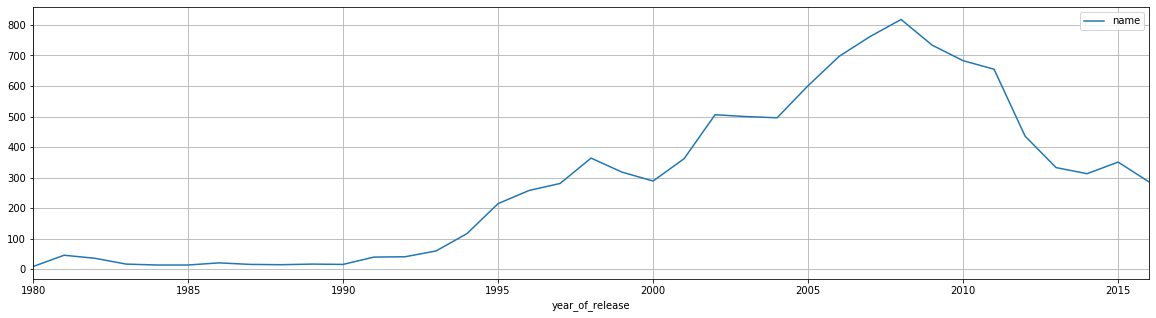

In [127]:
import matplotlib.pyplot as plt
data.pivot_table(index='year_of_release', values='name', aggfunc = lambda x: len(x.unique()) ).plot( grid=True, figsize=(20, 5))
plt.show()


Данные до 1995 считаю не важными. 

Смотрю, как менялись продажи по платформам. Какие вообще есть платформы.

In [128]:
print( data['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Выбераю платформу с наибольшими суммарными продажами 

In [131]:
top_platform = pd.pivot_table(data, values=['sales'], index= ['platform'], aggfunc= {'sales': np.sum} )
best10 = top_platform.sort_values(by = 'sales', ascending=False).head(10)
print(best10)

print(data.groupby(['platform'], as_index=False)['sales'].sum().nlargest(10, 'sales')['platform'].tolist())


            sales
platform         
PS2       1171.19
X360       948.74
PS3        921.09
Wii        791.91
PS         714.26
DS         655.36
PS4        314.00
PSP        273.11
GBA        263.70
GB         254.43
['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS', 'PS4', 'PSP', 'GBA', 'GB']


Строю распределение платформ по годам

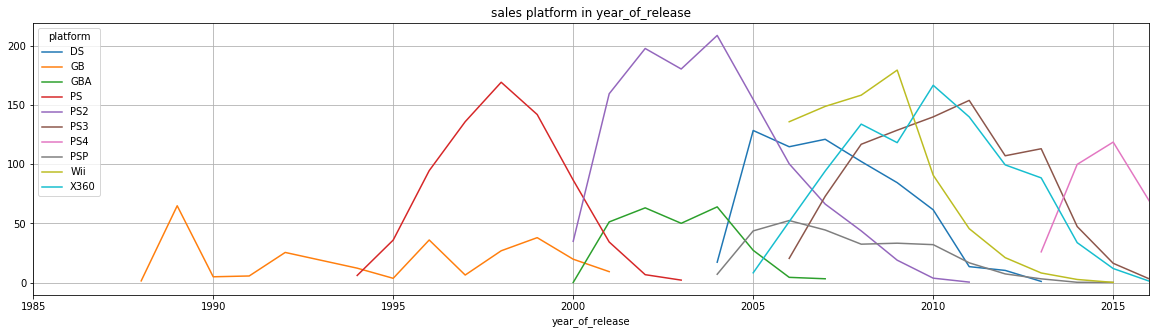

In [132]:
most = data.groupby(['platform'], as_index=False)['sales'].sum().nlargest(10, 'sales')['platform'].tolist()
data_filtered = data[data['platform'].isin(most)]
data_platform_year =  pd.pivot_table(data_filtered, index='year_of_release', columns='platform', values='sales', aggfunc= {'sales': np.sum}  )
data_platform_year.plot( grid=True, figsize=(20, 5),title='sales platform in year_of_release')
plt.show()

Посчитатла для каждой платформы разницу  публикации первой и последней игры, например: 2014-2009=5 лет. Далее нашла средний срок: 

In [133]:
result = pd.pivot_table(data, index=['platform'], values=['year_of_release'], aggfunc=lambda x: np.max(x) - np.min(x))
print(result.mean())
period = 2017 - result.mean()
print('Актуальный период: ', period)

year_of_release    7.580645
dtype: float64
Актуальный период:  year_of_release    2009.419355
dtype: float64


7-8 лет - это характерный срок, жизни платформы

Строю распределение платформ по продажам после 2009. Актуальный период получается с 2009 года. 
Основной фактор — эти данные помогут построить прогноз на 2017 год

Не учитывая, в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выбрала наиболее потенциально прибыльных платформ.

In [135]:
platform = pd.pivot_table(data.query('year_of_release >= 2010'), values=['sales'], index= ['platform'], aggfunc= {'sales': np.max })
print(platform.sort_values(by = 'sales', ascending=False).head(10))

          sales
platform       
X360      21.82
PS3       21.05
DS        15.13
PS4       14.63
3DS       14.60
Wii       10.12
XOne       7.39
WiiU       7.09
PC         5.14
PSP        4.87


In [136]:
import seaborn as sns

Построила график «ящик с усами» по глобальным продажам и разбивкой по платформам. 

(0, 25)

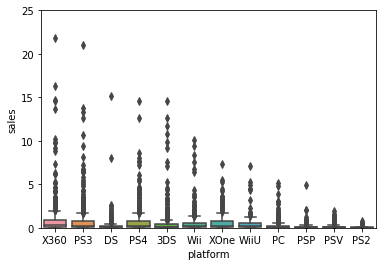

In [137]:
import matplotlib.pyplot as plt 
platform_actual = data.query('year_of_release >= 2010')
sns.boxplot(y="sales", x="platform", data = platform_actual)
plt.savefig('plot.png')
plt.ylim(0, 25)

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Возьмем платформу PS2 

              critic_score     sales  user_score
critic_score      1.000000  0.375291    0.212591
sales             0.375291  1.000000    0.247753
user_score        0.212591  0.247753    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9312f2f10>,
      dtype=object)

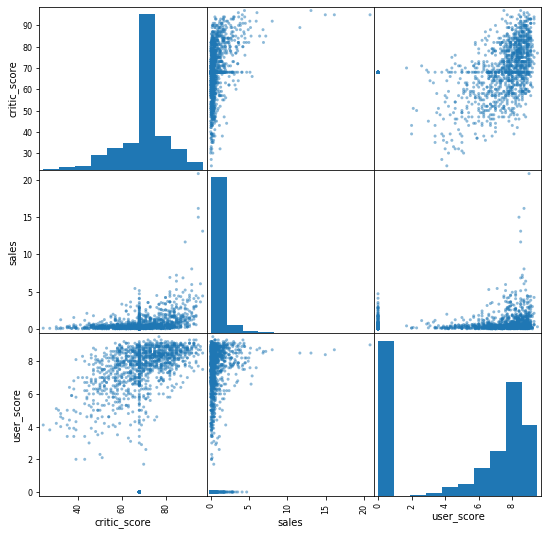

In [138]:
import matplotlib.pyplot as plt

for row in data:
    data['id_row'] = data.index

corr = data.query('platform == "PS2"').pivot_table(index='id_row', values=['critic_score','user_score', 'rating','sales'], aggfunc='mean')
print(corr.corr())
pd.plotting.scatter_matrix(corr, figsize=(9, 9))

Зависимость 

Посмотрим на общее распределение игр по жанрам.

In [139]:
print( data['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [140]:
n = 10
most_frequent_values = data['genre'].value_counts()[:n].index.tolist()
print(most_frequent_values)
data_filtered = data[data['genre'].isin(most_frequent_values)]

top_genre = pd.pivot_table(data_filtered, values=['sales'], index= ['genre'], aggfunc= {'sales': np.sum} )
print(top_genre.sort_values(by = 'sales', ascending=False).head(10))

['Action', 'Sports', 'Role-Playing', 'Misc', 'Shooter', 'Adventure', 'Racing', 'Fighting', 'Platform', 'Strategy']
                sales
genre                
Action        1648.51
Sports        1227.54
Shooter       1033.94
Role-Playing   927.63
Platform       798.01
Misc           692.98
Racing         688.81
Fighting       437.04
Adventure      203.52
Strategy       169.99


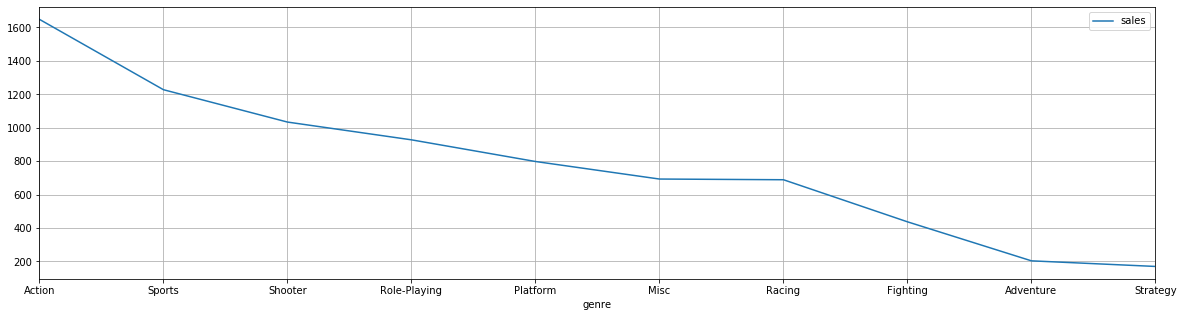

In [141]:
top_genre.sort_values(by = 'sales', ascending=False).plot( grid=True, figsize=(20, 5))
plt.show()

Жанры Action (англ. «действие») и Sports (англ. «виды спорта») являются самыми прибыльными. В то время как Strategy наоборот менее прибыльны. 

<div style=" padding: 10px"> <h1 style=" margin-bottom:10px">    Шаг 4. Составила портрет пользователя каждого региона
Определила для пользователя каждого региона (NA, EU, JP): </h1>

<h1>Самые популярные жанры (топ-5). </h1>

          na_sales
genre             
Action      818.22
Sports      616.00
Shooter     579.41
Platform    426.10
Misc        333.65


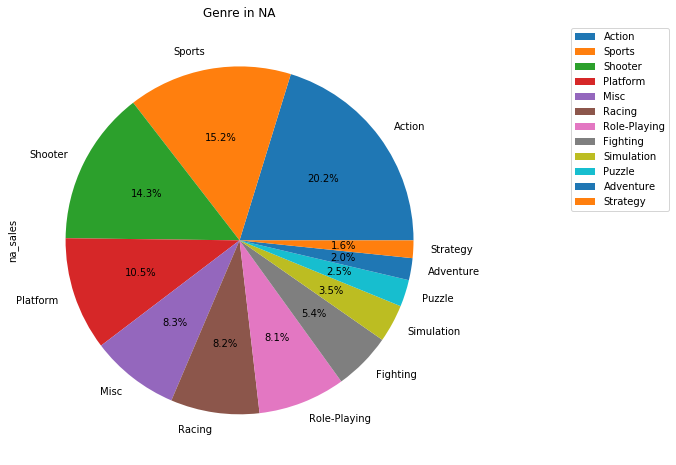

In [142]:
top_genre_na = pd.pivot_table(data, values=['na_sales'], index= ['genre'], aggfunc= {'na_sales': np.sum} )
print(top_genre_na.sort_values(by = 'na_sales', ascending=False).head(5))
top_genre_na.sort_values(by = 'na_sales', ascending=False).plot(kind='pie',title='Genre in NA',  autopct='%1.1f%%', y='na_sales', figsize=(8, 8)).legend(bbox_to_anchor=(1.5, 1))
plt.show()

          eu_sales
genre             
Action      494.88
Sports      352.33
Shooter     312.95
Racing      226.68
Platform    191.99


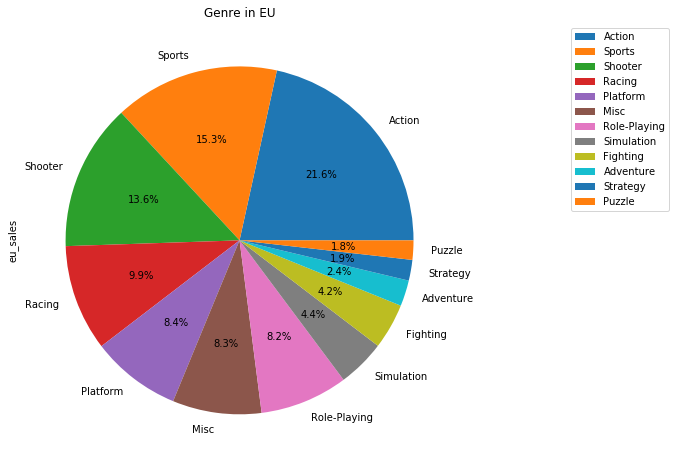

In [143]:
top_genre_eu = pd.pivot_table(data, values=['eu_sales'], index= ['genre'], aggfunc= {'eu_sales': np.sum} )
print(top_genre_eu.sort_values(by = 'eu_sales', ascending=False).head(5))
top_genre_eu.sort_values(by = 'eu_sales', ascending=False).plot(kind='pie',title='Genre in EU',  autopct='%1.1f%%', y='eu_sales', figsize=(8, 8)).legend(bbox_to_anchor=(1.5, 1))
plt.show()

              jp_sales
genre                 
Role-Playing    353.03
Action          158.85
Sports          134.06
Platform        130.49
Misc            106.31


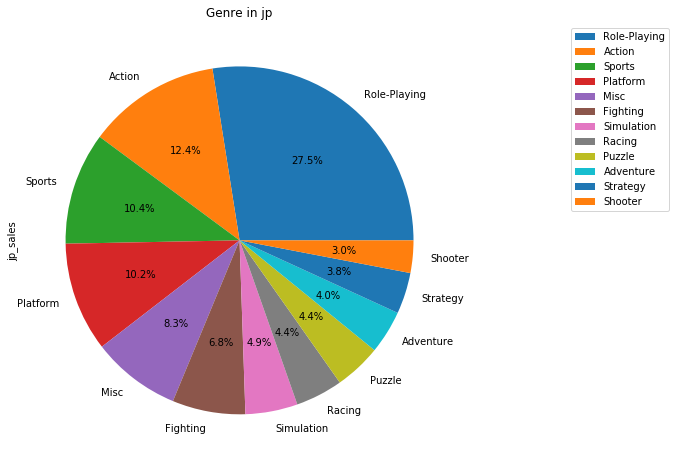

In [144]:
top_genre_jp = pd.pivot_table(data, values=['jp_sales'], index= ['genre'], aggfunc= {'jp_sales': np.sum} )
print(top_genre_jp.sort_values(by = 'jp_sales', ascending=False).head(5))
top_genre_jp.sort_values(by = 'jp_sales', ascending=False).plot(kind='pie',title='Genre in jp',  autopct='%1.1f%%', y='jp_sales', figsize=(8, 8)).legend(bbox_to_anchor=(1.5, 1))
plt.show()

<div style=" padding: 2px"> <h1 style=" margin-bottom:2px">Самые популярные платформы (топ-5).</h1>

          na_sales
platform          
X360        585.84
PS2         543.72
Wii         412.77
PS3         383.80
PS          327.29


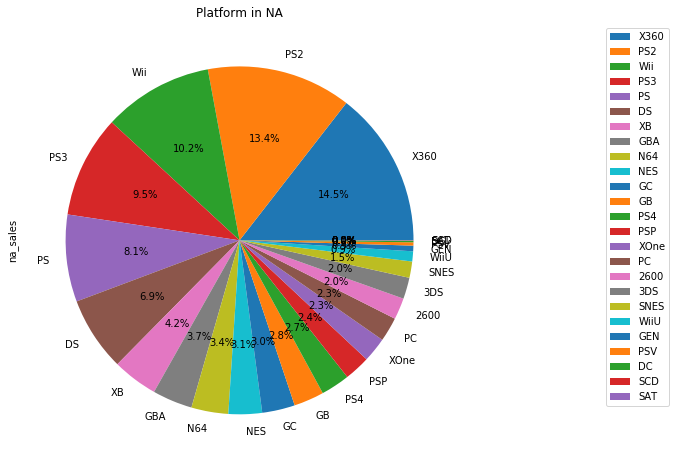

In [145]:
top_platform_na = pd.pivot_table(data, values=['na_sales'], index= ['platform'], aggfunc= {'na_sales': np.sum} )
print(top_platform_na.sort_values(by = 'na_sales', ascending=False).head(5))
top_platform_na.sort_values(by = 'na_sales', ascending=False).plot(kind='pie',title='Platform in NA',  autopct='%1.1f%%', y='na_sales', figsize=(8, 8)).legend(bbox_to_anchor=(1.5, 1))
plt.show()

          eu_sales
platform          
PS3         324.88
PS2         310.88
X360        266.74
Wii         241.29
PS          207.38


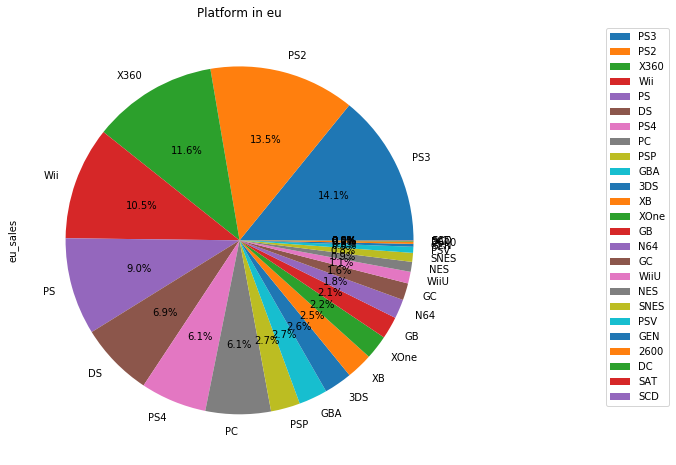

In [146]:
top_platform_eu = pd.pivot_table(data, values=['eu_sales'], index= ['platform'], aggfunc= {'eu_sales': np.sum} )
print(top_platform_eu.sort_values(by = 'eu_sales', ascending=False).head(5))
top_platform_eu.sort_values(by = 'eu_sales', ascending=False).plot(kind='pie',title='Platform in eu',  autopct='%1.1f%%', y='eu_sales', figsize=(8, 8)).legend(bbox_to_anchor=(1.5, 1))
plt.show()

          jp_sales
platform          
DS          171.54
PS          139.78
PS2         136.75
SNES        116.55
3DS         100.39


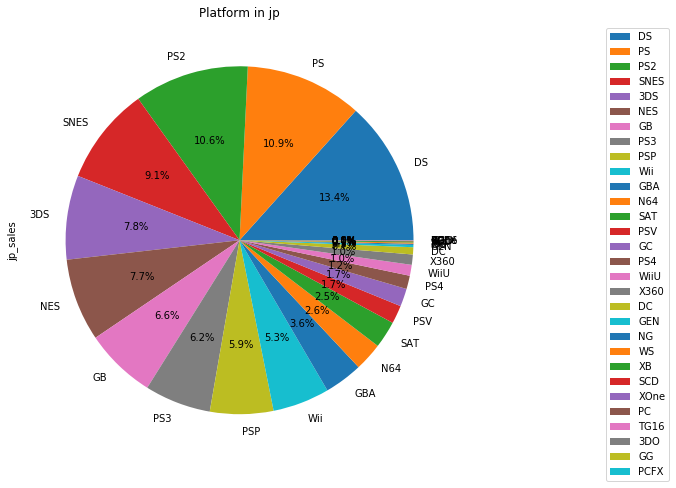

In [147]:
top_platform_jp = pd.pivot_table(data, values=['jp_sales'], index= ['platform'], aggfunc= {'jp_sales': np.sum} )
print(top_platform_jp.sort_values(by = 'jp_sales', ascending=False).head(5))
top_platform_jp.sort_values(by = 'jp_sales', ascending=False).plot(kind='pie',title='Platform in jp',  autopct='%1.1f%%', y='jp_sales', figsize=(8, 8)).legend(bbox_to_anchor=(1.5, 1))
plt.show()

<div style=" padding: 2px"> <h1 style=" margin-bottom:2px">Влияет ли рейтинг ESRB на продажи в отдельном регионе?</h1>   

In [148]:
print( data['rating'].unique())

['E' '0' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


        na_sales
rating          
0        1225.08
E        1056.03
M         739.90
T         714.11
E10+      305.86
K-A         2.56
AO          1.26
EC          0.12
RP          0.00


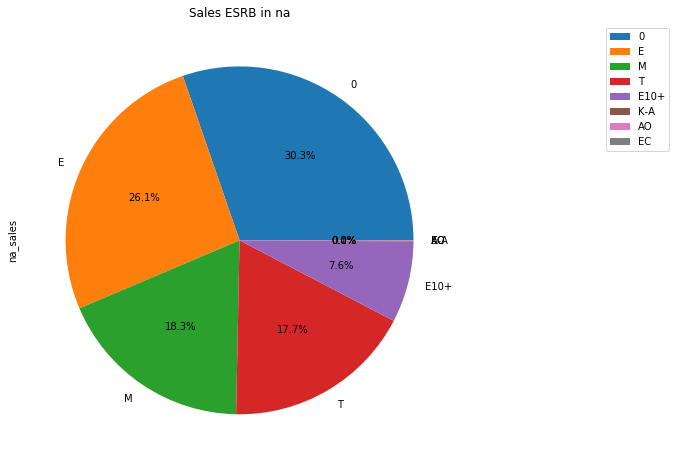

In [149]:
top_rating_na = pd.pivot_table(data, values=['na_sales'], index= ['rating'], aggfunc= {'na_sales': np.sum} )
print(top_rating_na.sort_values(by = 'na_sales', ascending=False).head(10))
top_rating_na.sort_values(by = 'na_sales', ascending=False).plot(kind='pie',title='Sales ESRB in na',  autopct='%1.1f%%', y='na_sales', figsize=(8, 8)).legend(bbox_to_anchor=(1.5, 1))
plt.show()

        eu_sales
rating          
E         630.01
0         608.73
M         478.45
T         408.67
E10+      169.58
AO          0.61
K-A         0.27
EC          0.09
RP          0.03


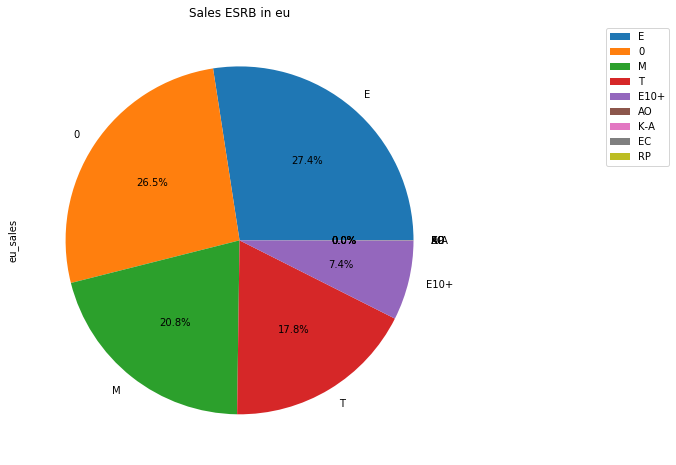

In [150]:
top_rating_eu = pd.pivot_table(data, values=['eu_sales'], index= ['rating'], aggfunc= {'eu_sales': np.sum} )
print(top_rating_eu.sort_values(by = 'eu_sales', ascending=False).head(10))
top_rating_eu.sort_values(by = 'eu_sales', ascending=False).plot(kind='pie',title='Sales ESRB in eu',  autopct='%1.1f%%', y='eu_sales', figsize=(8, 8)).legend(bbox_to_anchor=(1.5, 1))
plt.show()

        jp_sales
rating          
0         836.77
E         194.05
T         149.09
M          63.57
E10+       39.12
K-A         1.46
AO          0.00
EC          0.00
RP          0.00


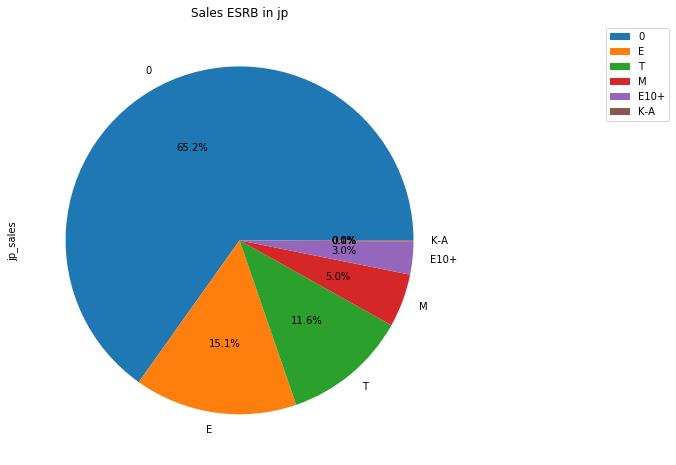

In [151]:
top_rating_jp = pd.pivot_table(data, values=['jp_sales'], index= ['rating'], aggfunc= {'jp_sales': np.sum} )
print(top_rating_jp.sort_values(by = 'jp_sales', ascending=False).head(10))
top_rating_jp.sort_values(by = 'jp_sales', ascending=False).plot(kind='pie',title='Sales ESRB in jp',  autopct='%1.1f%%', y='jp_sales', figsize=(8, 8)).legend(bbox_to_anchor=(1.5, 1))
plt.show()

<div style=" padding: 20px"> <h1 style=" margin-bottom:20px"> Выводы</h1>
Посчитала самы популярные жанры и платформы в европе и в амереки они схожи. А вот Япония играет в другие игры и любит другие жанры. Рейтинг ESRB в Японии не влияет на продажию А вот в США и Европе другая картина.

<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Шаг 5. Провка гипотезы</h1>

<div style=" padding: 2px"> <h1 style=" margin-bottom:2px">Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</h1>

In [152]:
from scipy import stats as st
alpha = .05
# задаем критический уровень статистической значимости

xbox = data.query('platform == "XOne"')['user_score']
pc = data.query('platform == "PC"')['user_score']
results = st.ttest_ind(xbox, pc)
#  проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

     

p-значение: 0.00011628630981227402
Отвергаем нулевую гипотезу


<div style=" padding: 2px"> <h1 style=" margin-bottom:2px">Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.</h1>

In [153]:
print( data['genre'].unique())
from scipy import stats as st
alpha = .05
# задаем критический уровень статистической значимости

data_Action = data.query('genre == "Action"')['user_score']
data_Sports = data.query('genre == "Sports"')['user_score']
results = st.ttest_ind(data_Action, data_Sports)
#  проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
p-значение: 0.0008127536068819031
Отвергаем нулевую гипотезу


<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Шаг 5. Общий вывод</h1>
Итак, я опровергла гипотезу о равенстве средних пользовательские рейтинги платформ Xbox One и PC.
И не получилось отвергнуть нулевую гипотезу о разных средних пользовательских рейтингов жанров Action и Sports. 
Выявила определяющие успешность игры закономерности. Оценки пользователей и критиков.
Определила, что 7-8 лет - это характерный срок, жизни платформы
Посчитала самы популярные жанры в европе и в амереки они схожи. А вот Япония играет в другие игры и любит другие жанры.